In [55]:
import nltk
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
from textblob import TextBlob
import matplotlib.pyplot as plt

In [37]:
ct = pd.read_csv('cointelegraph.csv')
rc = pd.read_csv('reddit_crypto.csv')

In [53]:
ct.sample(5)

,coin,head,news_date,resumo,author,views,comments,polarity,subjectivity
3152,altcoin,Bitcoin Hovers Near 7000 While Altcoins Show M...,2018-08-05,"After yesterday’s nosedive, Bitcoin continues ...",Marie Huillet,41870.0,8,0.100000,0.50
1484,bitcoin,Ichimoku Reversal How Ride Bitcoin Bull,2014-11-14,Well the signal came in super bullish fashion....,George Samman,266.0,0,0.000000,0.00
4273,blockchain,Huobi Launches Australian Exchange Ahead Block...,2018-07-05,Australia has gained a dedicated arm of Chines...,William Suberg,14621.0,2,0.000000,0.00
6471,ripple,Cryptocurrency Markets Falling After Recent Ri...,2018-01-14,The cryptocurrency markets have taken a fall t...,Molly Jane Zuckerman,177084.0,43,0.166667,0.25
3806,blockchain,Belarus Seeks South Korean Investors Intereste...,2018-09-06,Belarus is seeking South Korean investors inte...,Ana Alexandre,3612.0,1,0.250000,0.50


In [51]:
rc.sample(5)

,coin,comment_karma,comments,fonte,head,moderator,news_date,post_karma,rank,score,subscribers,user,polarity
8083,Zclassic,28,69,self.ZClassic,This community crazy,False,2018-02-27,147,9,88,6704,Hamtaro59,-0.6
18866,Byteball Bytes,3,0,i.redd.it,Satoshi Nakamoto photographed underwear big dude,False,2018-10-20,141,431,9,3048,MindFleet,0.0
17091,EOS,0,3,self.eos,1 Million Dollars Dividends another BIG promotion,False,2018-10-12,27,567,54,59682,Myeospress,0.0
21006,Dash,28,5,dash.org,Proposal Core Team Compensation November,True,2017-10-23,877,734,35,22605,notmyby,0.0
19145,Bytecoin,0,9,self.BytecoinBCN,BCN maintenance Poloniex two week Over 250000 ...,False,2018-01-04,10,722,12,13693,Suncrest777,0.0


1. Cleaning the pontuation

In [40]:
ct['head'] = ct['head'].apply(lambda x: re.sub('[^\w\s]', '', x))
rc['head'] = rc['head'].apply(lambda x: re.sub('[^\w\s]', '', x))

2. Remove the useless words using stopwords

In [41]:
stop = stopwords.words('english')
ct['head'] = ct['head'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
rc['head'] = rc['head'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

3. Lemmatizing words (using its dictionary to take words 'roots'

In [42]:
lemztr = WordNetLemmatizer()
ct['head'] = ct['head'].apply(lambda x: ' '.join([lemztr.lemmatize(word) for word in x.split()]))
rc['head'] = rc['head'].apply(lambda x: ' '.join([lemztr.lemmatize(word) for word in x.split()]))

4. Sentiment analysis

In [54]:
ct['polarity'] = ct['head'].apply(lambda x: TextBlob(x).polarity)
rc['polarity'] = rc['head'].apply(lambda x: TextBlob(x).polarity)
ct['subjectivity'] = ct['head'].apply(lambda x: TextBlob(x).subjectivity)
rc['subjectivity'] = rc['head'].apply(lambda x: TextBlob(x).subjectivity)

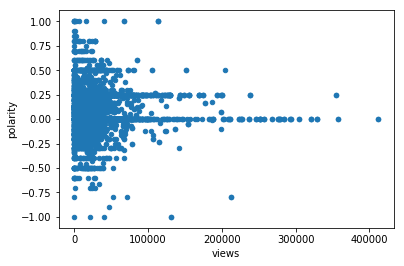

In [57]:
ct.plot.scatter('views', 'polarity')

In [58]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=2000)
wc.generate(' '.join(ct['head']))

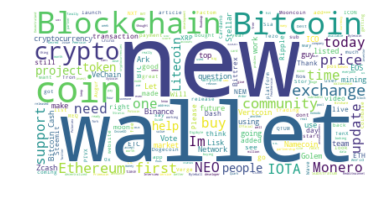

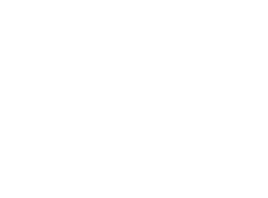

In [61]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(4, 3))
plt.axis("off")
plt.show()

In [60]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=2000)
wc.generate(' '.join(rc['head']))

In [63]:
ct.to_csv('cointelegraph_nlp.csv')
rc.to_csv('reddit_nlp.csv')